<a href="https://colab.research.google.com/github/guilleddls/datos-exploratory-data-analysis/blob/master/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import files
from oauth2client.client import GoogleCredentials


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
id='13r5od9LgQCWjT04oKLLlGhxg5Xk8VX18'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('test.csv')

id = '1RcMJKzEg1beb9mZXzAhwnjhhGT0NGTIR'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train.csv')

id= '1LYm_fv77kXJsxgaYlf-2frQyEKU7hoZW'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('sample_submission.csv')


In [0]:
test = pd.read_csv('test.csv' , encoding='latin-1')
train = pd.read_csv('train.csv' , encoding='latin-1')
submision = pd.read_csv('sample_submission.csv' , encoding='latin-1')

In [0]:
#test = test.merge(submision , right_on="id" , left_on="id" , how="left")
#data_set = pd.concat([test, train]).sort_values("id", ascending=True).reset_index()

In [6]:
print(train.shape)
print(test.shape)
#print(data_set.shape)

(7613, 5)
(3263, 4)


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
train.keyword.value_counts()

fatalities               45
deluge                   42
armageddon               42
harm                     41
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [10]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [0]:
data_set.to_excel('dataset.xlsx')
files.download('dataset.xlsx')

In [40]:
df_train = train.groupby("target").count()

fig = px.pie(df_train,
             values="id",
             names="id",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

In [120]:
df_train = list(map(lambda x : "NULO" if x == "NULO" else "NO NULO" , train.keyword))
df_train = pd.DataFrame(df_train)
df_train.columns = ["key"]
df_train["id"] = list(range(0, df_train.size))

df_train = df_train.groupby("key").count()

fig = px.pie(df_train,
             values="id",
             names="id",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

In [29]:
train = train.fillna('NULO')
ag = train.groupby('keyword').agg({'text':np.size, 'target':np.mean}).rename(columns={'text':'Cant', 'target':'Prob_Desastre'})
ag.sort_values('Prob_Desastre', ascending=False).head()

,Cant,Prob_Desastre
keyword,,
wreckage,39,1.000000
debris,37,1.000000
derailment,39,1.000000
outbreak,40,0.975000
oil%20spill,38,0.973684


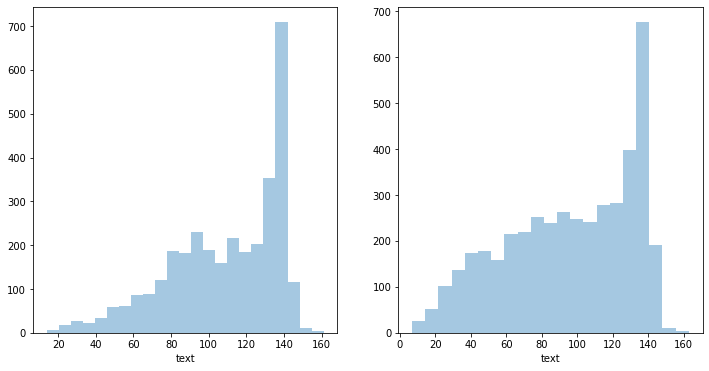

In [14]:
fig,axes = plt.subplots(1,2,figsize=(12,6))
char_len = train[train['target']==1]['text'].str.len()
sns.distplot(char_len,ax=axes[0],kde=False)

char_len = train[train['target']==0]['text'].str.len()
sns.distplot(char_len,ax=axes[1],kde=False)

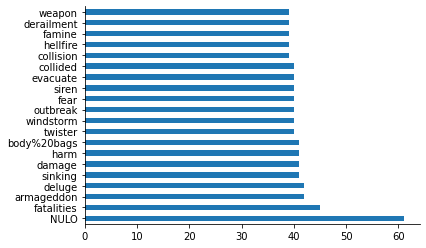

In [27]:
train['keyword'].value_counts().head(20).plot.barh()
sns.despine()


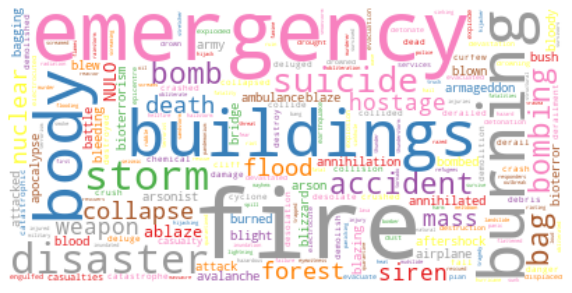

In [56]:
# Start with loading all necessary libraries
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


text = " ".join(str(e).replace("%20", " ") for e in train.keyword.unique())

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=222 ,colormap='Set1', background_color="white", ).generate(text)

# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()